In [6]:
# Imports
import numpy as np
import numpy.linalg as nplin
import numpy.random as npran
import scipy as sp
import scipy.linalg as splin
import scipy.stats as spstat
import matplotlib.pyplot as plt
import inspect
import requests
import urllib3, certifi
from __future__ import division

import glmnet
import knockoffGLM as ko
reload(ko)       # as I update it
import simulate as sim
reload(sim)

# show pyplots in the notebook
%matplotlib inline

In [7]:
# Since I'm parrallel computing, need to make sure I'm using different seeeds to generate random numbers
# these come from random.org, and should be truely random
# the function is a tad spotty due parsing a web page isntead of using the API, so may need to be run a few times
# also, it errors out when the request is rejected due to server load
seeds = sim.getRandomIntegers(num=1000,min=1,max=1000000000)

https://www.random.org/integers/?num=1000&min=1&max=1000000000&col=1&base=10&format=html&rnd=new


AttributeError: 'HTTPResponse' object has no attribute 'text'

In [155]:
# failing that, backup seeds gotten by good ol copy and paste
f = open('backup_seeds.txt','r')
seeds = [int(seed) for seed in f.read().split()]

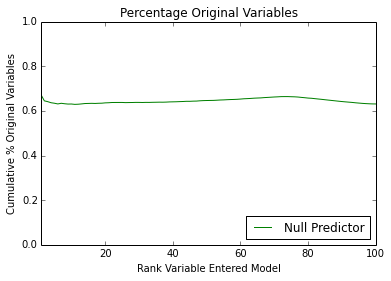

In [169]:
# All null normal variables
null_normal = sim.ko_test(procs=4,seeds=seeds,func=sim.genXy_normal_X_beta,n=1000,p1=0,pnull=100,base_prob=.25,beta_sd=1)
null_normal.plot_ko_rank_rate()

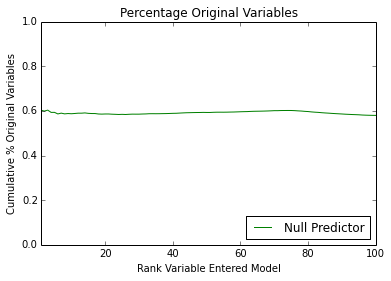

In [170]:
# All null variables, sparse
null_sparse = sim.ko_test(procs=4,seeds=seeds,func=sim.genXy_bern_X_norm_beta,n=1000,p1=0,pnull=100,x_prob=.25,base_prob=.25,beta_sd=1)
null_sparse.plot_ko_rank_rate()

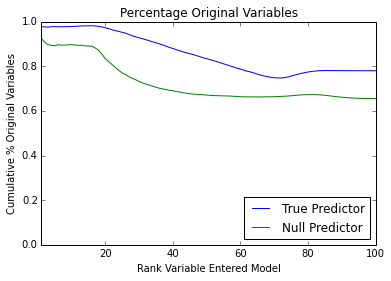

In [166]:
# 20 non-null, all normal variables
true20_normal = sim.ko_test(procs=4,seeds=seeds,func=sim.genXy_normal_X_beta,n=1000,p1=20,pnull=80,base_prob=.25,beta_sd=1)
true20_normal.plot_ko_rank_rate()

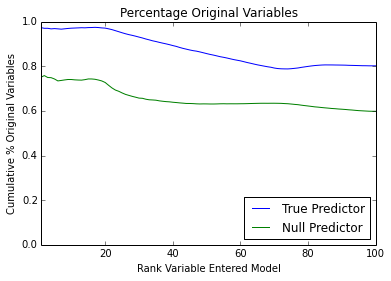

In [167]:
# 20 non-null, sparse
true20_sparse = sim.ko_test(procs=4,seeds=seeds,func=sim.genXy_bern_X_norm_beta,n=1000,p1=20,pnull=80,x_prob=.25,base_prob=.25,beta_sd=1)
true20_sparse.plot_ko_rank_rate()